In [206]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
import numpy as np

In [208]:
from Model import ReferenceDependenceClass

In [209]:
model = ReferenceDependenceClass()

In [210]:
print(model.par.ref_income_u)


print(model.par.r_u[35])

[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
0.40000000000000013


In [211]:
print(model.par.r_e_future)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [0.98       0.98       0.98       0.98       0.98       0.98
  0.98       0.98       0.98       0.98       0.98       0.98
  0.98       0.98       0.98      ]
 [0.96       0.96       0.96       0.96       0.96       0.96
  0.96       0.96       0.96       0.96       0.96       0.96
  0.96       0.96       0.98      ]
 [0.94       0.94       0.94       0.94       0.94       0.94
  0.94       0.94       0.94       0.94       0.94       0.94
  0.94       0.96       0.98      ]
 [0.92       0.92       0.92       0.92       0.92       0.92
  0.92       0.92       0.92       0.92       0.92       0.92
  0.94       0.96       0.98      ]
 [0.9        0.9        0.9        0.9        0.9        0.9
  0.9        0.9        0.9        0.9        0.9        0.92
  0.94       0.96       0.98      ]
 [0.88       0.88       0.88       0.88      

In [212]:
from hand_to_mouth import *

In [213]:
unemployed_ss(model.par)

(0.41099012573607546, -0.7172706216055236)

In [214]:
solve_search_effort(model.par)


(array([0.28286057, 0.28048092, 0.27894102, 0.27873792, 0.28063799,
        0.28584923, 0.29634957, 0.3155839 , 0.3501829 , 0.41527564,
        0.3983637 , 0.39193524, 0.38610475, 0.38158194, 0.37959682,
        0.38231372, 0.385657  , 0.3947142 , 0.41469705, 0.45734983,
        0.44545184, 0.43995869, 0.43476045, 0.43027359, 0.42725199,
        0.42707668, 0.42463654, 0.42219428, 0.41976933, 0.41739218,
        0.41511175, 0.41300821, 0.41121577, 0.40996359, 0.40965107,
        0.41099013]),
 array([-3.32024258, -3.14289527, -2.97206635, -2.81183605, -2.66826217,
        -2.55048402, -2.4726515 , -2.45758835, -2.54455702, -2.80837783,
        -3.41848462, -3.12644464, -2.84466402, -2.58045874, -2.34514119,
        -2.15659961, -2.04409797, -1.9688226 , -1.96068315, -2.07853533,
        -2.45400278, -2.23043191, -2.01488601, -1.81224844, -1.63005708,
        -1.4803504 , -1.38311792, -1.28751691, -1.19413504, -1.10372633,
        -1.01727947, -0.93612613, -0.86211838, -0.79792715, -0.7

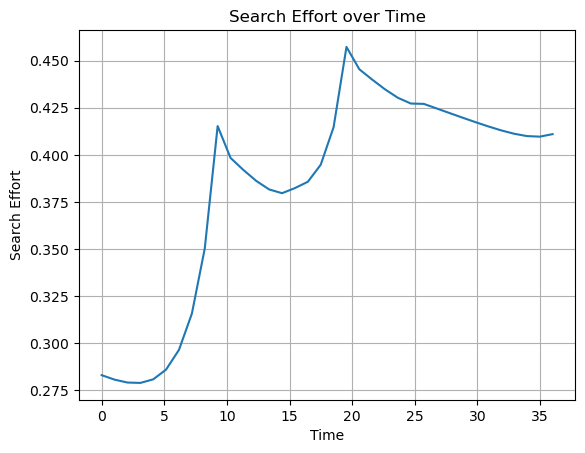

In [215]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
search_effort,value_function = solve_search_effort(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort)
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()
